In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.insert(0,'/content/drive/My Drive/')

In [3]:
import pandas as pd

cased_predictions_bert = pd.read_csv('/content/drive/My Drive/imdb_data/cased_predictions_bert.csv')
cased_predictions_bert = cased_predictions_bert[['y_pred', 'y_truth']]


In [4]:
import pandas as pd

predictions_bert = pd.read_csv('/content/drive/My Drive/imdb_data/predictions_bert.csv')
predictions_bert = predictions_bert[['y_pred', 'y_truth']]
predictions_bert.head()

,y_pred,y_truth
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0


In [6]:
predictions_rf = pd.read_csv('/content/drive/My Drive/imdb_data/predictions_rf.csv')
predictions_rf = predictions_rf[['y_pred', 'y_truth']]
predictions_rf.head()

,y_pred,y_truth
0,0,0
1,1,1
2,1,1
3,1,0
4,1,1


In [7]:
predictions_cnn = pd.read_csv('/content/drive/My Drive/imdb_data/predictions_CNN.csv')
predictions_cnn = predictions_cnn[['y_prediction', 'y_truth']]
predictions_cnn.head()

,y_prediction,y_truth
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


In [8]:
predictions_lstm = pd.read_csv('/content/drive/My Drive/imdb_data/predictions_RNN.csv')
predictions_lstm = predictions_lstm[['y_prediction', 'y_truth']]
predictions_lstm.head()

,y_prediction,y_truth
0,0,0
1,0,0
2,1,0
3,1,0
4,0,0


In [14]:
from sklearn.metrics import confusion_matrix

cm_bert = confusion_matrix(list(predictions_bert.y_truth), list(predictions_bert.y_pred))
cm_bert

cm_cased_bert = confusion_matrix(list(cased_predictions_bert.y_truth), list(cased_predictions_bert.y_pred))
cm_cased_bert

cm_rf = confusion_matrix(list(predictions_rf.y_truth), list(predictions_rf.y_pred))
cm_rf

cm_cnn = confusion_matrix(list(predictions_cnn.y_truth), list(predictions_cnn.y_prediction))
cm_cnn

cm_lstm = confusion_matrix(list(predictions_lstm.y_truth), list(predictions_lstm.y_prediction))
cm_lstm

array([[10976,  1524],
       [ 2856,  9644]])

In [15]:
import seaborn as sns
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(predictions, confusion_matrix):

    tn = confusion_matrix[0, 0]
    fp = confusion_matrix[0, 1]
    fn = confusion_matrix[1, 0]
    tp = confusion_matrix[1, 1]
    total = predictions.shape[0]
    percent = (confusion_matrix/confusion_matrix.sum())*100
    
    accuracy = ((tp+tn)/total)*100
    Precision = (tp/(tp+fp))*100
    Recall = (tp/(tp+fn))*100
    F1_score =  2 * (Precision * Recall) / (Precision + Recall)
    AUROC_score = roc_auc_score(list(predictions.y_truth), list(predictions.y_pred))
    
    df_cm = pd.DataFrame(confusion_matrix, ['Positive','Negative'], ['Positive','Negative'])
    text = np.asarray([['True Negatives', 'False Positives'], ['False Negatives', 'True Positives']])
    label = (np.asarray(["{0}\n\n{1}\n\n{2: .2f}%".format(text,confusion_matrix,percent) for text, confusion_matrix, percent in zip(text.flatten(), confusion_matrix.flatten(), percent.flatten())])).reshape(2,2)
    
    plt.figure(figsize=(10,10))
    sns.set(font_scale=2)
    sns.heatmap(df_cm, annot=label, annot_kws={"size": 20}, cbar_kws={'label':"Reviews"}, fmt ='', cmap ='Greens')
    
    plt.title('Confusion Matrix', fontsize=20)
    plt.text(0.1, 2.5, 'Precision: '+str(round(Precision,2)) + '        Recall: '+str(round(Recall,2))+'     F1 Score: '+str(round(F1_score,2))+
            '\n\nAccuracy: '+ str(round(accuracy,2))+'          AUROC:'+ str(round(AUROC_score,2)), fontsize=20)
    plt.show()

def plot_confusion_matrix2(predictions, confusion_matrix):

    tn = confusion_matrix[0, 0]
    fp = confusion_matrix[0, 1]
    fn = confusion_matrix[1, 0]
    tp = confusion_matrix[1, 1]
    total = predictions.shape[0]
    percent = (confusion_matrix/confusion_matrix.sum())*100
    
    accuracy = ((tp+tn)/total)*100
    Precision = (tp/(tp+fp))*100
    Recall = (tp/(tp+fn))*100
    F1_score =  2 * (Precision * Recall) / (Precision + Recall)
    AUROC_score = roc_auc_score(list(predictions.y_truth), list(predictions.y_prediction))
    
    df_cm = pd.DataFrame(confusion_matrix, ['Positive','Negative'], ['Positive','Negative'])
    text = np.asarray([['True Negatives', 'False Positives'], ['False Negatives', 'True Positives']])
    label = (np.asarray(["{0}\n\n{1}\n\n{2: .2f}%".format(text,confusion_matrix,percent) for text, confusion_matrix, percent in zip(text.flatten(), confusion_matrix.flatten(), percent.flatten())])).reshape(2,2)
    
    plt.figure(figsize=(10,10))
    sns.set(font_scale=2)
    sns.heatmap(df_cm, annot=label, annot_kws={"size": 20}, cbar_kws={'label':"Reviews"}, fmt ='', cmap ='Blues')
    
    plt.title('Confusion Matrix', fontsize=20)
    plt.text(0.1, 2.5, 'Precision: '+str(round(Precision,2)) + '        Recall: '+str(round(Recall,2))+'     F1 Score: '+str(round(F1_score,2))+
            '\n\nAccuracy: '+ str(round(accuracy,2))+'          AUROC:'+ str(round(AUROC_score,2)), fontsize=20)
    plt.show()

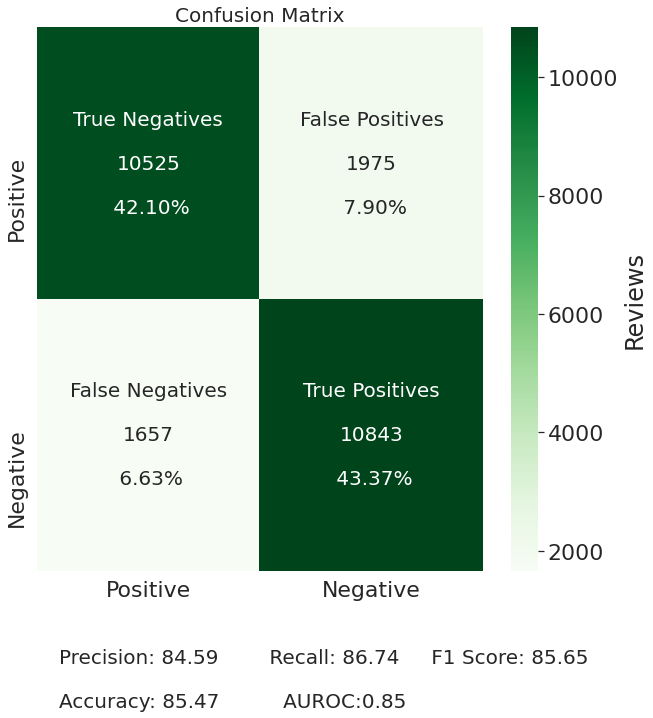

In [16]:
plot_confusion_matrix(cased_predictions_bert, cm_cased_bert)

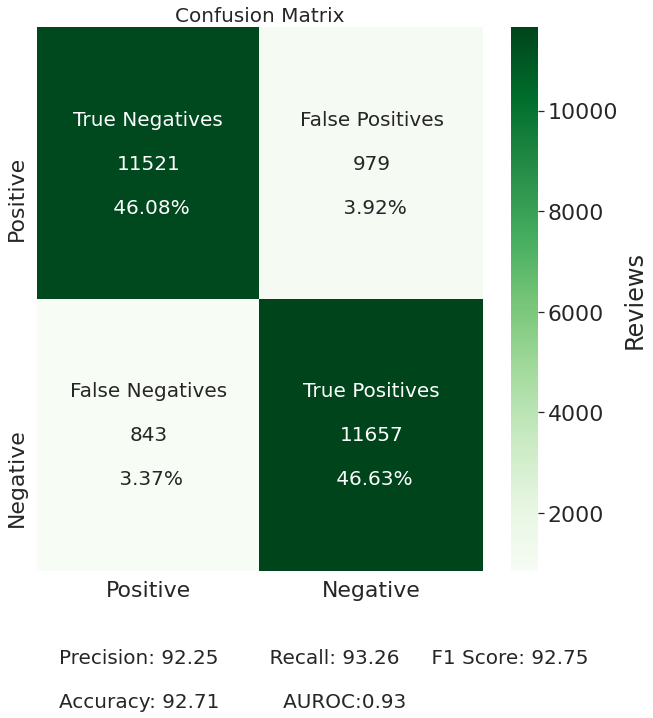

In [17]:
plot_confusion_matrix(predictions_bert, cm_bert)

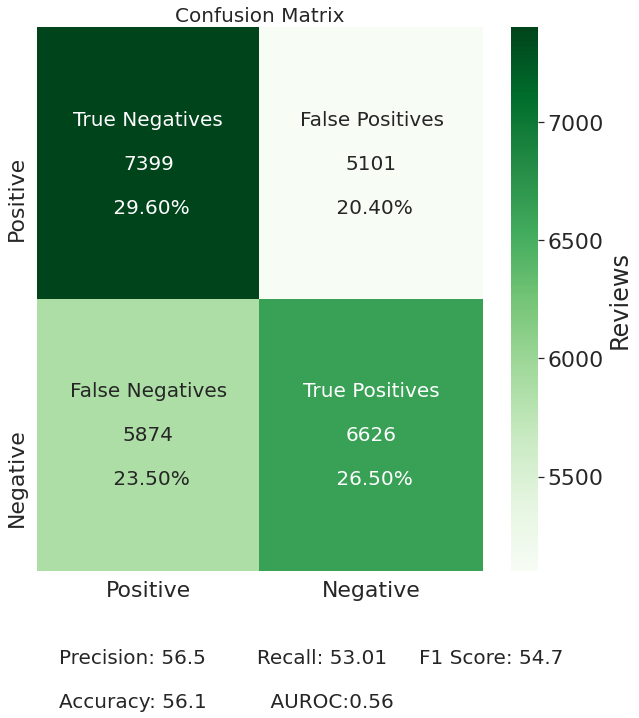

In [18]:
plot_confusion_matrix(predictions_rf, cm_rf)

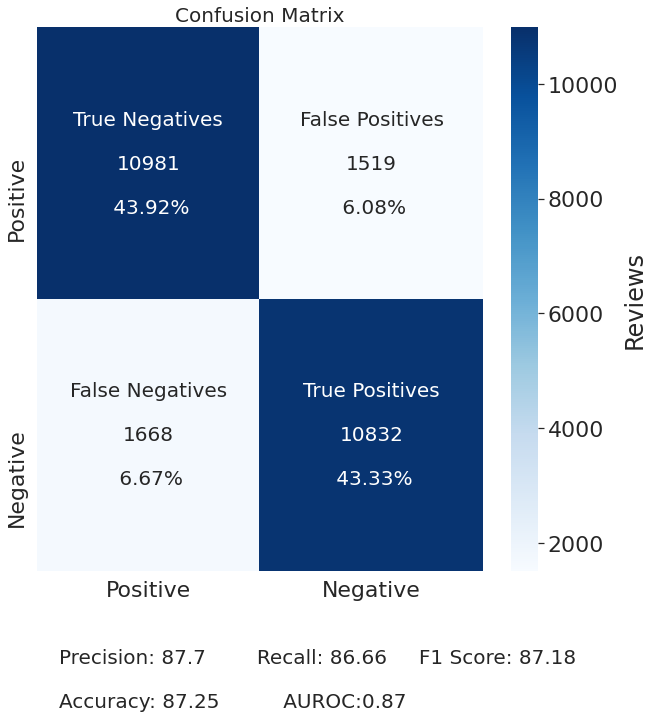

In [19]:
plot_confusion_matrix2(predictions_cnn, cm_cnn)

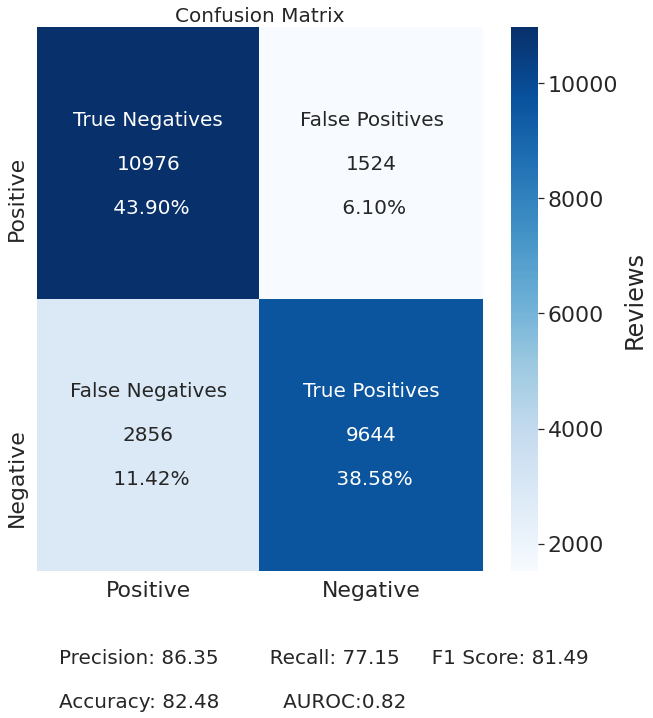

In [20]:
plot_confusion_matrix2(predictions_lstm, cm_lstm)

In [21]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipa

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/ml_imdb_error_analysis.ipynb" ./ 
!jupyter nbconvert --to PDF "ml_imdb_error_analysis.ipynb"

[NbConvertApp] Converting notebook ml_imdb_error_analysis.ipynb to PDF
[NbConvertApp] Support files will be in ml_imdb_error_analysis_files/
[NbConvertApp] Making directory ./ml_imdb_error_analysis_files
[NbConvertApp] Making directory ./ml_imdb_error_analysis_files
[NbConvertApp] Making directory ./ml_imdb_error_analysis_files
[NbConvertApp] Making directory ./ml_imdb_error_analysis_files
[NbConvertApp] Making directory ./ml_imdb_error_analysis_files
[NbConvertApp] Writing 61435 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']


In [ ]:
files.download('/content/ml_imdb_error_analysis.ipynb')
files.download('/content/ml_imdb_error_analysis.pdf')